In [1]:
import numpy as np
from PIL import ImageFont
from generate_char_palette import *
from matplotlib import pyplot as plt
from statistics import mean

In [2]:
FONT = ImageFont.truetype("fonts/CascadiaMono.ttf", 32)
WINDOW_SIZE = (1,1)

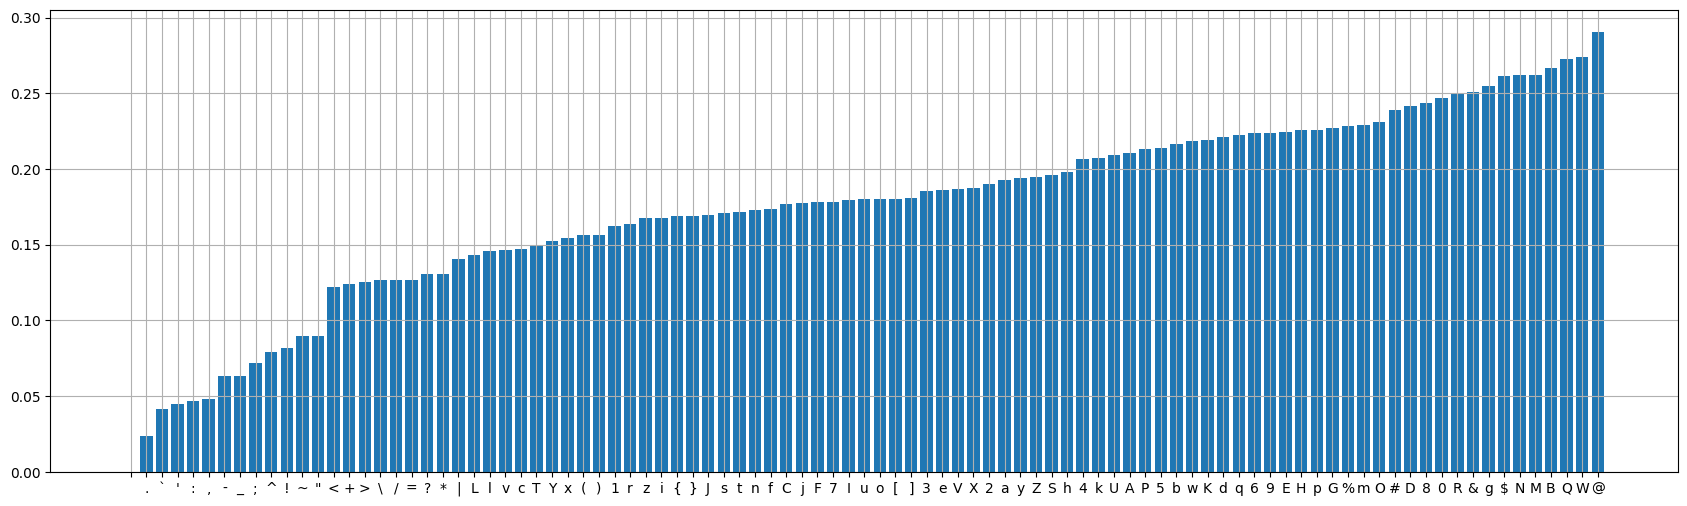

In [3]:
asciis = get_asciis()
brightness_map = generate_brightness_map(asciis, FONT, WINDOW_SIZE)
brightness = [b[0][0] for b in brightness_map.values()]
brightness = list(zip(asciis, brightness))
brightness = sorted(brightness, key=lambda a: a[1])
plt.figure(figsize=(21, 6))
plt.bar([a[0] for a in brightness], [a[1] for a in brightness])
plt.grid()

In [4]:
bins = 12
char_bins = [[] for _ in range(bins)]
bin_br = [[] for _ in range(bins)]
br_max = brightness[-1][1]
br_step = br_max / (bins-1)
for char, char_br in brightness:
    bin_index = int(round(char_br / br_step))
    char_bins[bin_index].append(char)
    bin_br[bin_index].append(char_br)

char_bins = list(filter(lambda b: len(b) > 0, char_bins))
bin_br = list(filter(lambda b: len(b) > 0, bin_br))
bin_br = list(map(mean, bin_br))

print([''.join(l) for l in char_bins])
print(bin_br)

[' ', '.', "`':,-_", ';^!~"', '<+>\\/=?*|L', 'lvcTYx()1rzi{}Js', 'tnfCjF7Iuo[]3eVX2ayZS', 'h4kUAP5bwKdq69E', 'HpG%mO#D80R&', 'g$NMBQW', '@']
[0.0, 0.02335453100158983, 0.05134340222575517, 0.08235294117647059, 0.12962586115527291, 0.15925973767885532, 0.1831296843061549, 0.21526726726726725, 0.2365531708178767, 0.2647452494511318, 0.2906518282988871]


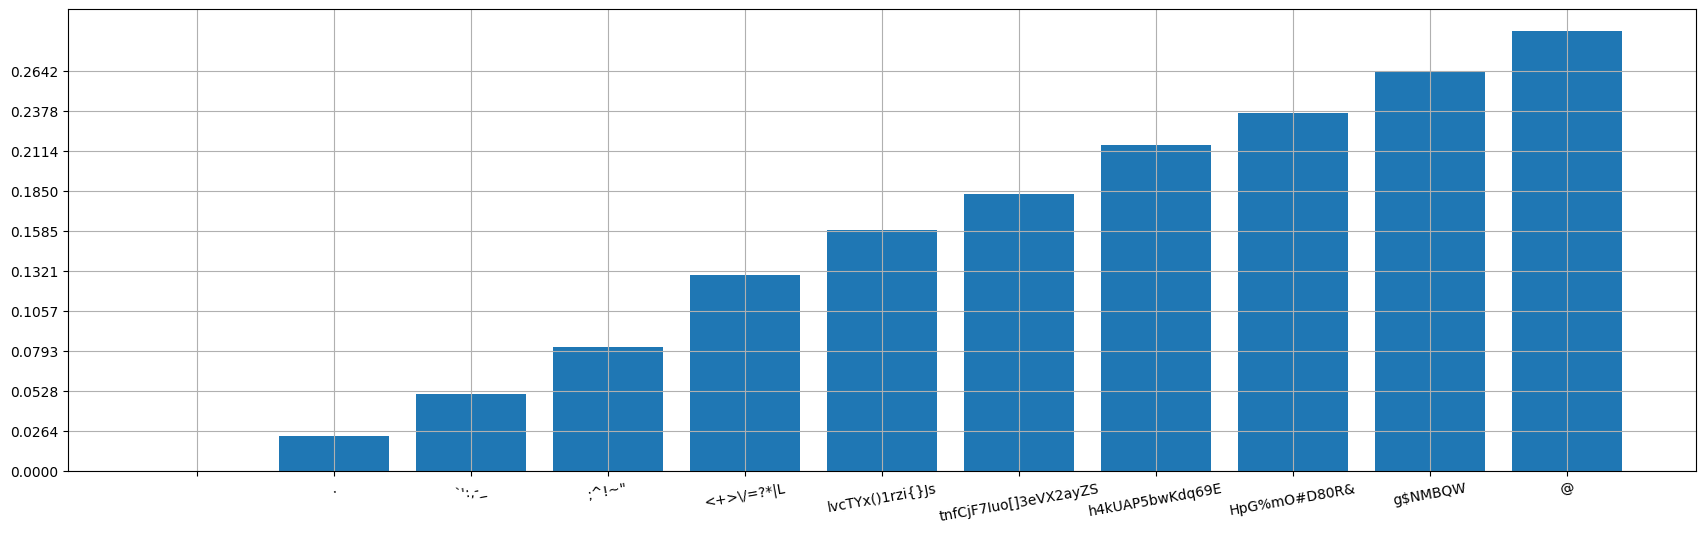

In [5]:
plt.figure(figsize=(21, 6))
plt.yticks(np.arange(0, br_max, br_step))
plt.xticks(rotation=10)
plt.bar([''.join(l) for l in char_bins], bin_br)
plt.grid()

In [6]:
char_bins, bins_br = generate_1_1_palette(get_asciis(), FONT, 12)

print(char_bins)
print(bins_br)

[[' '], ['.'], ['`', "'", ':', ',', '-', '_'], [';', '^', '!', '~', '"'], ['"'], ['<', '+', '>', '=', '/', '\\', '?', '*', '|', 'L'], ['l', 'v', 'c', 'T', 'Y', 'x', '(', ')', '1', 'r', 'z', 'i', '{', '}', 'J', 's', 't'], ['n', 'f', 'C', 'j', 'F', '7', 'I', 'u', 'o', '[', ']', '3', 'e', 'V', 'X', '2', 'a', 'y', 'Z', 'S'], ['h', '4', 'k', 'U', 'A', 'P', '5', 'b', 'w', 'K', 'd', 'q', '9', '6', 'E'], ['H', 'p', 'G', '%', 'm', 'O', '#', 'D', '8', '0', 'R', '&'], ['g', '$', 'N', 'M', 'B', 'Q', 'W'], ['@']]
[0.0, 0.006968733439321674, 0.015303833245009717, 0.02456597774244833, 0.02673555908850026, 0.03864864864864865, 0.04772623834907572, 0.054793587705352406, 0.06421762939409999, 0.07055688040982158, 0.07897418426830193, 0.0867461579226285]
